In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Wrangling
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import os
import flammkuchen as fl

# Image
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [4]:
from fig_1_helper import labels_cat, color, color_bouts, cmp_bouts, labels_cat_short
from fig_1_helper import radians_to_degrees, simplify_fish_id, resort_ipsi_contra_traces

In [6]:
alph=0.5
size=1
cm_ = 1/2.54  # centimeters in inches
f_size =6
lw=0.5
dpi= 600

### Setup paths

In [7]:
figure_path = Path(r"\\portulab.synology.me\data\Kata\Figures_Paper\Figure_1\supp\suppl_2")

In [8]:
out_path = Path(r"\\portulab.synology.me\data\Kata\Processed_Data")

In [9]:
path_features_all = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data\features_bouts_new.csv')
path_features_all

WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features_bouts_new.csv')

In [10]:
path_traces =  Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data\tensors\tensor.h5')

In [11]:
features_all = pd.read_csv(path_features_all)
features_all.head()

,Unnamed: 0,exp,fish_id,bout_angle,cluster,frame_start,frame_end,bout_id_orig,mb_proba,max_eye_rot,...,tail_freq,l_fin_freqs,r_fin_freqs,tail_max_freq,l_fin_max_freqs,r_fin_max_freqs,l_start,l_end,r_start,r_end
0,0,13052024_visstim_2D_round,240513_f0,3.000171,0,18375,18410,78,0.806645,-0.239648,...,0.121622,0.105263,0.109756,0.166667,0.166667,0.166667,0.0,27.0,0.0,28.0
1,1,13052024_visstim_2D_round,240513_f0,1.649302,0,19461,19484,80,1.000000,0.479035,...,0.058140,0.117647,0.119048,0.166667,0.166667,0.250000,0.0,15.0,7.0,26.0
2,2,13052024_visstim_2D_round,240513_f0,-0.861132,0,19661,19689,81,1.000000,-1.120168,...,0.097561,0.115385,0.104167,0.166667,0.166667,0.125000,4.0,20.0,0.0,27.0
3,3,13052024_visstim_2D_round,240513_f0,0.870591,0,20257,20292,84,1.000000,-2.662451,...,0.114286,0.117647,0.117647,0.166667,0.166667,0.125000,19.0,35.0,0.0,35.0
4,4,13052024_visstim_2D_round,240513_f0,2.231631,0,20824,20859,86,1.000000,-1.192489,...,0.108108,0.116667,0.103448,0.166667,0.125000,0.125000,0.0,23.0,6.0,28.0


## Panel B: Bout Categories for single fish

In [12]:
fish_id = '240423_f0'
features = features_all[features_all.fish_id == fish_id]
new_clusters_fish = features_all[features_all.fish_id == fish_id].cluster.astype(int)

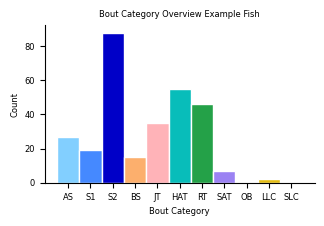

In [15]:
plt.figure(facecolor='None',figsize=(8.5*cm_, 6*cm_))
ax = sns.histplot(new_clusters_fish, bins=np.arange(0,12,1), edgecolor='w', common_norm=False)
for i in range(11):
    ax.patches[i].set_facecolor(color[i])
plt.xticks(np.arange(0,11,1)+0.5, labels=labels_cat_short, rotation =0)
plt.title('Bout Category Overview Example Fish', fontsize=f_size)
plt.xlabel('Bout Category', fontsize=f_size)
plt.ylabel('Count', fontsize=f_size)
plt.tick_params(axis='both', which='major', labelsize=f_size)  # Adjust the labelsize as desired
sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()
plt.savefig(figure_path/ '{}_bout_cat_hist.pdf'.format(fish_id), dpi=dpi)
plt.savefig(figure_path/ '{}_bout_cat_hist.png'.format(fish_id), dpi=dpi)

## Panel C: Bout Statistics for Single Fish

In [20]:
single_ibi_path = Path(r'//portulab.synology.me/data/Kata/Processed_Data/22042024_visstim_2D_round_/{}_ibi.h5'.format(fish_id))
single_ibi = fl.load(single_ibi_path)

In [21]:
single_dist_path = Path(r'//portulab.synology.me/data/Kata/Processed_Data/22042024_visstim_2D_round_/{}_distances.h5'.format(fish_id))
single_dist = fl.load(single_dist_path)
duration = features_all[features_all.fish_id == fish_id].tail_duration.values

In [16]:
data_path = Path(r'//portulab.synology.me/data/Kata/Processed_Data/22042024_visstim_2D_round_/{}_bout_data.h5'.format(fish_id))

In [17]:
data = fl.load(data_path)

In [18]:
bout_angles = data['body_angles_delta']
l_fin_angles = data['fin_angles'][:,0]
r_fin_angles = data['fin_angles'][:,1]
l_eye_angles = data['eye_angles'][:,0]
r_eye_angles = data['eye_angles'][:,1]

In [19]:
flattened_l_fin_angles = radians_to_degrees(l_fin_angles.flatten())
flattened_r_fin_angles = radians_to_degrees(r_fin_angles.flatten())
flattened_l_eye_angles = l_eye_angles.flatten()
flattened_r_eye_angles = r_eye_angles.flatten()

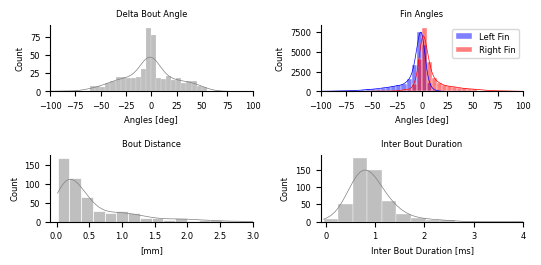

In [26]:
fig, axes = plt.subplots(2,2,facecolor='None',figsize=(14*cm_, 7*cm_), sharex=False, sharey=False)
axes = axes.ravel()

bins = np.arange(np.min(features.bout_angle), np.max(features.bout_angle), 5)
ax=sns.histplot(data=bout_angles, bins=bins, ax=axes[0], kde=True,  lw=lw,edgecolor='w', color='gray')
for line in ax.get_lines():
    line.set_linewidth(lw)  # Set the desired line width here
axes[0].set_title('Delta Bout Angle', fontsize=f_size)
axes[0].set_xlabel('Angles [deg]', fontsize=f_size)
axes[0].set_xlim(-100,100)

ax=sns.histplot(data=flattened_l_fin_angles, bins=bins, ax=axes[1], kde=True, lw=lw,  edgecolor='w',color='b', label='Left Fin')
for line in ax.get_lines():
    line.set_linewidth(lw)  # Set the desired line width here
ax=sns.histplot(data=flattened_r_fin_angles, bins=bins, ax=axes[1], kde=True, lw=lw,  edgecolor='w',color='r', label='Right Fin')
for line in ax.get_lines():
    line.set_linewidth(lw)  # Set the desired line width here
    
axes[1].set_title('Fin Angles', fontsize=f_size)
axes[1].set_xlabel('Angles [deg]', fontsize=f_size)
axes[1].set_xlim(-100,100)
axes[1].legend(fontsize=f_size)

ax= sns.histplot(data=single_dist, bins=25, ax=axes[2], color='gray', lw=lw, edgecolor='w', kde=True)
for line in ax.get_lines():
    line.set_linewidth(lw)  # Set the desired line width here
axes[2].set_title('Bout Distance', fontsize=f_size)
axes[2].set_xlabel('[mm]', fontsize=f_size)
axes[2].set_xlim(-0.1,3)

ax=sns.histplot(data=single_ibi, bins=50, ax=axes[3], color='gray', lw=lw, edgecolor='w', kde=True)
for line in ax.get_lines():
    line.set_linewidth(lw)  # Set the desired line width here
axes[3].set_title('Inter Bout Duration', fontsize=f_size)
axes[3].set_xlabel('Inter Bout Duration [ms]', fontsize=f_size)
axes[3].set_xlim(-0.1, 4)

for ax in axes:
    ax.set_ylabel('Count', fontsize=f_size)
    ax.tick_params(axis='both', which='major', labelsize=f_size)  # Adjust the labelsize as desired

sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()

fig.savefig(figure_path/ 'exp_fish_panel.pdf', dpi =dpi)
fig.savefig(figure_path/ 'exp_fish_panel.png', dpi =dpi)

## Panel D: All fish

In [27]:
# Apply the function to the 'fish_ids' column
features_all['fish_ids'] = features_all['fish_id'].apply(simplify_fish_id)
fish_ids = np.unique(features_all['fish_ids'])
len(fish_ids)

64

In [28]:
### tail, left fin, right fin, left eye, right eye
traces =  fl.load(path_traces)
l_fin = traces[:,1,:]
r_fin = traces[:,2,:]
flattened_l_fin_angles = radians_to_degrees(l_fin.flatten())
flattened_r_fin_angles = radians_to_degrees(r_fin.flatten())

In [29]:
ibi_paths = list(out_path.rglob('*ibi.h5'))
dist_paths = list(out_path.rglob('*distances.h5'))
len(dist_paths)

98

In [30]:
distances = []

for path in dist_paths:
    dist = fl.load(path)
    # print (dist.shape)
    distances.append(dist)

ibis = []

for path in ibi_paths:
    ibi = fl.load(path)
    ibis.append(ibi)

flattened_distances = [item for sublist in distances for item in sublist]
flattened_distances = np.asarray(flattened_distances)
flattened_ibis = [item for sublist in ibis for item in sublist]
flattened_ibis = np.asarray(flattened_ibis)

### Panel D: Behavior Assessment for pooled fish

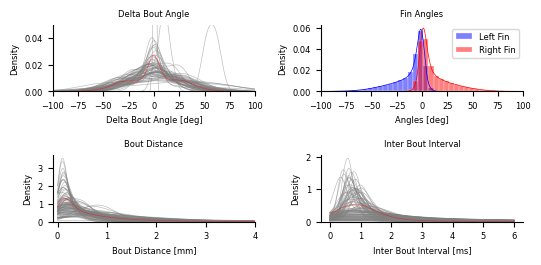

In [34]:
fig, axes = plt.subplots(2,2,facecolor='None',figsize=(14*cm_, 7*cm_), sharex=False, sharey=False)
axes = axes.ravel()

###  bout angles
lim_min = np.min(features_all.bout_angle)
lim_max = np.max(features_all.bout_angle)
for i in range(len(fish_ids)):
    durations_fish = features_all[features_all.fish_id == fish_ids[i]].bout_angle.values
    sns.kdeplot(durations_fish, fill=False,  color='gray',  alpha=alph,  lw=lw, clip=(lim_min, lim_max), ax=axes[0])
sns.kdeplot(features_all.bout_angle.values, fill=False, color='red', alpha=alph,  lw=lw, clip=(lim_min, lim_max), ax=axes[0])
axes[0].set_title('Delta Bout Angle', fontsize=f_size)
axes[0].set_xlabel('Delta Bout Angle [deg]', fontsize=f_size)
axes[0].set_xlim(-100,100)
axes[0].set_ylim(0, 0.05)

### fin angles
bins = np.arange(lim_min, lim_max, 5)
ax = sns.histplot(data=flattened_l_fin_angles, bins=bins, edgecolor='w',  label='Left Fin',  stat='density', color='b', kde=True, ax=axes[1])
for line in ax.get_lines():
    line.set_linewidth(lw)  # Set the desired line width here

ax= sns.histplot(data=flattened_r_fin_angles, bins=bins, edgecolor='w',  label='Right Fin', stat='density', color='r', kde=True, ax=axes[1])
for line in ax.get_lines():
    line.set_linewidth(lw)  # Set the desired line width here

axes[1].set_title('Fin Angles', fontsize=f_size)
axes[1].set_xlabel('Angles [deg]', fontsize=f_size)
axes[1].legend(fontsize=f_size)
axes[1].set_xlim(-100,100)

### distances and IBI
for i in range(len(distances)):
    sns.kdeplot(distances[i], fill=False,  ax=axes[2], lw=lw, color='gray', alpha=alph, clip=(0, 6))
sns.kdeplot(flattened_distances, fill=False,  ax=axes[2], lw=lw, color='red', alpha=alph, clip=(0, 6))
for i in range(len(ibis)):
    sns.kdeplot(ibis[i], fill=False,  ax=axes[3], lw=lw, color='gray', alpha=alph, clip=(0, 6))
sns.kdeplot(flattened_ibis, fill=False,  ax=axes[3], lw=lw, color='red', alpha=alph, clip=(0, 6))  

axes[2].set_xlim(-0.1,3)
axes[2].set_xlim(-0.1,4)
axes[2].set_title('Bout Distance', fontsize=f_size)
axes[2].set_xlabel('Bout Distance [mm]', fontsize=f_size)
axes[3].set_title('Inter Bout Interval', fontsize=f_size)
axes[3].set_xlabel('Inter Bout Interval [ms]', fontsize=f_size)

for ax in axes:
    ax.set_ylabel('Density', fontsize=f_size)
    ax.tick_params(axis='both', which='major', labelsize=f_size)  # Adjust the labelsize as desired

sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()

fig.savefig(figure_path/ 'pooled_angles.pdf', dpi =dpi)
fig.savefig(figure_path/ 'pooled_angles.png', dpi =dpi)